<a href="https://colab.research.google.com/github/desaigeet96/DL_Assignments/blob/main/DL_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import os
import pandas as pd

## Creating soups and url strings

In [2]:
ie_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013")    #indian elephant
ie_soup = BeautifulSoup(ie_page.content, 'html.parser')   #puts the content of the website into the soup variable, each url on a different line


In [3]:
ae_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458")    #african elephant synset
ae_soup = BeautifulSoup(ae_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

In [4]:
t_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265")   #tuskers synset
t_soup = BeautifulSoup(t_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line

In [8]:
ie_str_soup=str(ie_soup)    
type(ie_str_soup)
ie_split_urls=ie_str_soup.split('\r\n')     
print(len(ie_split_urls))     


1650


In [9]:
ae_str_soup=str(ae_soup)      
type(ae_str_soup)
ae_split_urls=ae_str_soup.split('\r\n')     
print(len(ae_split_urls))

2278


In [10]:
t_str_soup=str(t_soup)      #convert soup to string so it can be split
type(t_str_soup)
t_split_urls=t_str_soup.split('\r\n')     #split so each url is a different possition on a list
print(len(t_split_urls))

1065


## Making Directories

In [11]:
#check if all the images where stored on the files system
!mkdir /content/train #create the Train folder
!mkdir /content/train/Indian_Elephant    #create the ie folder
!mkdir /content/train/African_Alephant    #create the ae folder
!mkdir /content/train/Tuskers    #create the t folder

!mkdir /content/validation
!mkdir /content/validation/Indian_Elephant #create the ie folder
!mkdir /content/validation/African_Alephant #create the ae folder
!mkdir /content/validation/Tuskers #create the t folder

!mkdir /content/test/ 
!mkdir /content/test/test #list the files inside test

## Setting up Image parameter and fetching function

In [12]:
img_rows, img_cols = 32, 32     #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)   #format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image


## Storing Train Images

In [13]:
n_of_training_images=150    #the number of training images to use

for progress in range(n_of_training_images):    #store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not ie_split_urls[progress] == None:
      try:
        I = url_to_image(ie_split_urls[progress])
        if (len(I.shape))==3:    #check if the image has width, length and channels
          save_path = '/content/train/Indian_Elephant/img'+str(progress)+'.jpg'      #create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


In [14]:
#do the same for ae:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not ae_split_urls[progress] == None:
      try:
        I = url_to_image(ae_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/African_Alephant/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


In [15]:
#do the same for t:
for progress in range(n_of_training_images):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not t_split_urls[progress] == None:
      try:
        I = url_to_image(t_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/train/Tuskers/img'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
60
80
100
120
140


## Storing Validation Images

In [16]:
for progress in range(50):      #store all the images on a directory
    # Print out progress whenever progress is a multiple of 10 so we can follow the
    # (relatively slow) progress
    if(progress%10==0):
        print(progress)
    if not ie_split_urls[n_of_training_images+progress] == None:
      try:
        I = url_to_image(ie_split_urls[n_of_training_images+progress])      #get images that are different from the ones used for training
        if (len(I.shape))==3:       #check if the image has width, length and channels
          save_path = '/content/validation/Indian_Elephant/img'+str(progress)+'.jpg'      #create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
10
20
30
40


In [17]:
#do the same for ae:
for progress in range(50):    #store all the images on a directory
    # Print out progress whenever progress is a multiple of 10 so we can follow the
    # (relatively slow) progress
    if(progress%10==0):
        print(progress)
    if not ae_split_urls[n_of_training_images+progress] == None:
      try:
        I = url_to_image(ae_split_urls[n_of_training_images+progress])   #get images that are different from the ones used for training
        if (len(I.shape))==3:     #check if the image has width, length and channels
          save_path = '/content/validation/African_Alephant/img'+str(progress)+'.jpg'   #create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
10
20
30
40


In [18]:
#do the same for t:
for progress in range(50):    #store all the images on a directory
    # Print out progress whenever progress is a multiple of 10 so we can follow the
    # (relatively slow) progress
    if(progress%10==0):
        print(progress)
    if not t_split_urls[progress] == None:
      try:
        I = url_to_image(t_split_urls[n_of_training_images+progress])   #get images that are different from the ones used for training
        if (len(I.shape))==3:       #check if the image has width, length and channels
          save_path = '/content/validation/Tuskers/img'+str(progress)+'.jpg'    #create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
10
20
30
40


In [19]:
print("\nTRAIN:\n")          
print("\nlist the files inside Indian_Elephant directory:\n")        
!ls /content/train/Indian_Elephant    #list the files inside ships
print("\nlist the files inside African_Alephant directory:\n")
!ls /content/train/African_Alephant    #list the files inside bikes
print("\nlist the files inside Tuskers directory:\n")
!ls /content/train/Tuskers    #list the files inside bikes


print("\nVALIDATION:\n")
print("\nlist the files inside Indian_Elephant directory:\n")        
!ls /content/validation/Indian_Elephant     #list the files inside ships
print("\nlist the files inside African_Alephant directory:\n")
!ls /content/validation/African_Alephant     #list the files inside bikes 
print("\nlist the files inside Tuskers directory:\n")
!ls /content/validation/Tuskers     #list the files inside bikes   


TRAIN:


list the files inside Indian_Elephant directory:

img0.jpg    img115.jpg	img131.jpg  img25.jpg  img48.jpg  img70.jpg  img87.jpg
img100.jpg  img117.jpg	img133.jpg  img2.jpg   img51.jpg  img71.jpg  img88.jpg
img103.jpg  img119.jpg	img139.jpg  img30.jpg  img52.jpg  img74.jpg  img91.jpg
img104.jpg  img11.jpg	img145.jpg  img31.jpg  img54.jpg  img76.jpg  img92.jpg
img105.jpg  img121.jpg	img148.jpg  img35.jpg  img55.jpg  img77.jpg  img94.jpg
img106.jpg  img122.jpg	img15.jpg   img3.jpg   img57.jpg  img78.jpg  img95.jpg
img107.jpg  img123.jpg	img17.jpg   img41.jpg  img5.jpg   img79.jpg  img97.jpg
img108.jpg  img125.jpg	img18.jpg   img44.jpg  img60.jpg  img7.jpg   img98.jpg
img110.jpg  img127.jpg	img1.jpg    img45.jpg  img63.jpg  img80.jpg  img9.jpg
img112.jpg  img12.jpg	img20.jpg   img46.jpg  img64.jpg  img82.jpg
img114.jpg  img130.jpg	img22.jpg   img47.jpg  img65.jpg  img83.jpg

list the files inside African_Alephant directory:

img0.jpg    img125.jpg	img144.jpg  img27.jpg  img46.jpg

## Modelling

### Resnet 50

In [20]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

In [21]:
resnet_50_model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 2s 0us/step


In [22]:
NUM_CLASSES = 3
CHANNELS = 3
IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

LOSS_METRICS = ['accuracy']
NUM_EPOCHS = 20
EARLY_STOP_PATIENCE = 3
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

In [23]:
custom_model = Sequential()
custom_model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = "imagenet"))
custom_model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
custom_model.layers[0].trainable = False

94773248/94765736 [==============================] - 2s 0us/step


In [24]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 3)                 6147      
Total params: 23,593,859
Trainable params: 6,147
Non-trainable params: 23,587,712
_________________________________________________________________


In [25]:
custom_model.compile(optimizer = "adam", loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [26]:
image_size = IMAGE_RESIZE
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        '/content/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/validation',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

Found 280 images belonging to 3 classes.
Found 104 images belonging to 3 classes.


In [27]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = 'best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [28]:
fit_history = custom_model.fit_generator(
        train_generator,
        #steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        #validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
3/3 [==============================] - 3s 1s/step - loss: 1.4572 - accuracy: 0.3286 - val_loss: 1.4600 - val_accuracy: 0.3462
Epoch 2/20
3/3 [==============================] - 2s 692ms/step - loss: 1.2833 - accuracy: 0.3929 - val_loss: 1.2371 - val_accuracy: 0.3462
Epoch 3/20
3/3 [==============================] - 2s 827ms/step - loss: 1.0536 - accuracy: 0.4643 - val_loss: 1.2183 - val_accuracy: 0.4423
Epoch 4/20
3/3 [==============================] - 2s 679ms/step - loss: 0.9480 - accuracy: 0.5250 - val_loss: 1.0931 - val_accuracy: 0.4615
Epoch 5/20
3/3 [==============================] - 2s 815ms/step - loss: 0.8256 - accuracy: 0.6143 - val_loss: 1.0324 - val_accuracy: 0.5288
Epoch 6/20
3/3 [==============================] - 2s 713ms/step - loss: 0.7673 - accuracy: 0.6679 - val_loss: 0.9838 - val_accuracy: 0.5385
Epoch 7/20
3/3 [==============================] - 3s 852ms/step - loss: 0.6861 - accura

In [29]:
print(fit_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [30]:
import matplotlib.pyplot as plt


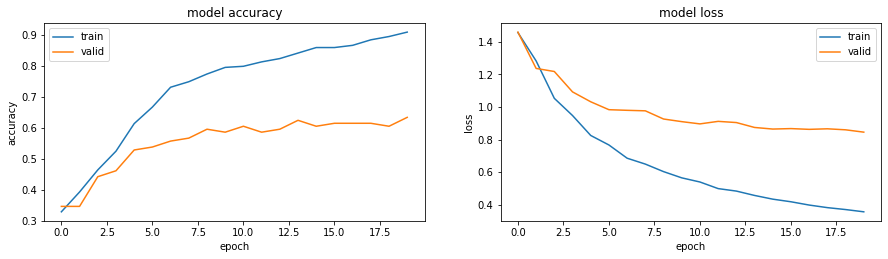

In [31]:
plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()


### Xception

In [32]:
from keras.applications import Xception

In [33]:
xception_custom_model = Sequential()
xception_custom_model.add(Xception(include_top=False, weights="imagenet", input_shape = (224, 224, 3), pooling="avg"))
xception_custom_model.add(Dense(3, activation="softmax"))

83689472/83683744 [==============================] - 3s 0us/step


In [34]:
xception_custom_model.layers[0].trainable = False

In [35]:
xception_custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 20,867,627
Trainable params: 6,147
Non-trainable params: 20,861,480
_________________________________________________________________


In [36]:
xception_custom_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = "accuracy")

In [37]:
xception_fit_history = xception_custom_model.fit_generator(
        train_generator,
        #steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        #validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)

Epoch 1/20
3/3 [==============================] - 3s 1s/step - loss: 3.2366 - accuracy: 0.3036 - val_loss: 1.9394 - val_accuracy: 0.3173
Epoch 2/20
3/3 [==============================] - 2s 553ms/step - loss: 1.9475 - accuracy: 0.3679 - val_loss: 2.3019 - val_accuracy: 0.3846
Epoch 3/20
3/3 [==============================] - 2s 601ms/step - loss: 2.0791 - accuracy: 0.4179 - val_loss: 1.7140 - val_accuracy: 0.3365
Epoch 4/20
3/3 [==============================] - 2s 592ms/step - loss: 1.6262 - accuracy: 0.4071 - val_loss: 1.4663 - val_accuracy: 0.3942
Epoch 5/20
3/3 [==============================] - 2s 553ms/step - loss: 1.5255 - accuracy: 0.4464 - val_loss: 1.5291 - val_accuracy: 0.4231
Epoch 6/20
3/3 [==============================] - 2s 561ms/step - loss: 1.4429 - accuracy: 0.4286 - val_loss: 1.4702 - val_accuracy: 0.3750
Epoch 7/20
3/3 [==============================] - 2s 592ms/step - loss: 1.2493 - accuracy: 0.4679 - val_loss: 1.4921 - val_accuracy: 0.4327
